## Data Analyst Portfolio Project 2

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
import pandas_datareader.data as web
import datetime as dt

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)

# Part 1: Pivot and Line Chart with pandas plot

#### Read **Final_Stocks.csv**data file into a dataframe  


In [24]:
df_stocks = pd.read_csv('Data\\Final_Stocks.csv')

print("Dataframe:  df_stocks")
print("Number of Rows: ", df_stocks.shape[0])
print("Number of Columns: ", df_stocks.shape[1])

df_stocks.head()

Dataframe:  df_stocks
Number of Rows:  968
Number of Columns:  3


,CloseDate,StockName,ClosingPrice
0,1/3/2007,Aapl,11.107141
1,2/1/2007,Aapl,10.962033
2,3/1/2007,Aapl,12.037377
3,4/2/2007,Aapl,12.930043
4,5/1/2007,Aapl,15.701322


#### Change data types 

In [25]:
df_stocks['CloseDate'] =   pd.to_datetime(df_stocks['CloseDate'])
df_stocks['ClosingPrice'] =   pd.to_numeric(df_stocks['ClosingPrice']).astype(float)
df_stocks.dtypes

CloseDate       datetime64[ns]
StockName               object
ClosingPrice           float64
dtype: object

### Pivot data  

In [26]:
df_wide_stocks = df_stocks.pivot(index='CloseDate', columns='StockName', values='ClosingPrice')

print("Dataframe:  df_wide_stocks")
print("Number of Rows: ", df_wide_stocks.shape[0])
print("Number of Columns: ", df_wide_stocks.shape[1])

df_wide_stocks.head()

Dataframe:  df_wide_stocks
Number of Rows:  121
Number of Columns:  8


StockName,Aapl,Adbe,Goog,IBM,Mdlz,Msft,Orcl,Sbux
CloseDate,,,,,,,,
2007-01-03,11.107141,38.869999,251.001007,79.242500,17.519524,24.118483,15.696321,15.752188
2007-02-01,10.962033,39.250000,224.949951,74.503204,16.019426,22.092464,15.028588,13.930813
2007-03-01,12.037377,41.700001,229.309311,75.561348,16.009354,21.857189,16.583584,14.138198
2007-04-02,12.930043,41.560001,235.925919,81.934280,16.924608,23.480597,17.196436,13.984914
2007-05-01,15.701322,44.060001,249.204208,85.786057,17.111704,24.146753,17.726965,12.988567


###  Using pandas *plot()* to create a Line Chart for Mdlz and Sbux

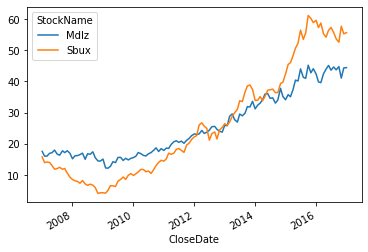

In [27]:
# Create a List filled with the countries to plot
stocks_to_plot = ['Mdlz', 'Sbux']

# plot the countries 
df_wide_stocks[stocks_to_plot].plot.line()

# Part 2 Groupby and Bar Chart with pandas plot()

#### Read Stocks data into dataframe

In [28]:
# Data to work on
df_sales = pd.DataFrame(
    [
    ['11/11/2014','Oklahoma','Technology','$221.98'], 
    ['11/11/2014','Oklahoma','Furniture','$341.96'],
    ['3/6/2012','Washington','Furniture','$48.71'],
    ['3/6/2012','Washington','Office Supplies','$17.94'],
    ['2/19/2012','Texas','Office Supplies','$12.62'],
    ['3/6/2012','Washington','Office Supplies','$242.94'],
    ['4/21/2012','New York','Office Supplies','$247.84'],
    ['12/27/2013','California','Technology','$668.16'],
    ['12/27/2013','California','Office Supplies','$323.10'],
    ['5/12/2012','California','Furniture','$279.46'],
    ['12/30/2012','New York','Technology','$34.77'],
    ['3/21/2014','Mississippi','Furniture','$86.45'],
    ], 
    columns=['Order Date','State','Category','Sales'])
  
df_sales

,Order Date,State,Category,Sales
0,11/11/2014,Oklahoma,Technology,$221.98
1,11/11/2014,Oklahoma,Furniture,$341.96
2,3/6/2012,Washington,Furniture,$48.71
3,3/6/2012,Washington,Office Supplies,$17.94
4,2/19/2012,Texas,Office Supplies,$12.62
5,3/6/2012,Washington,Office Supplies,$242.94
6,4/21/2012,New York,Office Supplies,$247.84
7,12/27/2013,California,Technology,$668.16
8,12/27/2013,California,Office Supplies,$323.10
9,5/12/2012,California,Furniture,$279.46


#### Clean up field junk and change data types

In [30]:
# Clean up field junk as needed
df_sales['Sales'] = df_sales['Sales'].str.replace('$', '')
df_sales['Sales'] = df_sales['Sales'].str.replace(',', '')

In [31]:
# Change data types as needed
df_sales['Sales'] = pd.to_numeric(df_sales['Sales']).astype(float)
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales.dtypes

Order Date    datetime64[ns]
State                 object
Category              object
Sales                float64
dtype: object

### Use groupby to Group data  
- Group by:  Category  
- For: Sales  
- Function:  sum()

In [32]:
sales_by_category = df_sales.groupby("Category")['Sales'].sum()
sales_by_category

Category
Furniture          756.58
Office Supplies    844.44
Technology         924.91
Name: Sales, dtype: float64

### Plot the Grouped data as a Bar Chart using pandas plot()

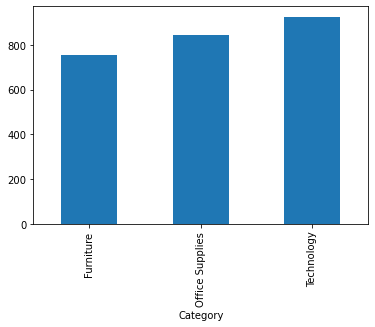

In [33]:
sales_by_category.plot.bar()

# Part 3: Yahoo Financial and cufflinks  

#### Retrieved Stock Data using Yahoo Financial  
- Stocks to Retrieve from Yahoo Financial: **CSCO, INTC, VZ**   
- Values to plot: **Open** 
- Timeframe: **2013-2016** 

In [37]:
# Start for Stock series:  Jan 1, 2013
start = dt.datetime(2013,1,1)

# End of Stock series:  Dec 31, 2016
end = dt.datetime(2016,12,31)

In [38]:
stocks_to_retrieve = ['CSCO', 'INTC', 'VZ']
df_stocks = web.DataReader(stocks_to_retrieve,'yahoo', start, end)
df_stocks.head()

Attributes  Adj Close                            Close                        \
Symbols          CSCO       INTC         VZ       CSCO       INTC         VZ   
Date                                                                           
2013-01-02  15.684022  16.707525  30.326756  20.340000  21.379999  44.270000   
2013-01-03  15.768842  16.660643  30.182898  20.450001  21.320000  44.060001   
2013-01-04  15.791974  16.535601  30.347305  20.480000  21.160000  44.299999   
2013-01-07  15.645470  16.605938  30.614473  20.290001  21.250000  44.689999   
2013-01-08  15.660891  16.480902  29.869463  20.309999  21.090000  43.099998   

Attributes   High                              Low                        \
Symbols      CSCO       INTC         VZ       CSCO       INTC         VZ   
Date                                                                       
2013-01-02  20.34  21.379999  44.509998  20.010000  21.049999  43.840000   
2013-01-03  20.50  21.480000  44.419998  20.299999  21.139999  43.790001   
2013-01-04  20.68  21.389999  44.360001  20.389999  21.049999  43.750000   
2013-01-07  20.42  21.450001  44.869999  20.160000  21.180000  44.009998   
2013-01-08  20.34  21.559999  44.259998  20.080000  21.020000  43.040001   

Attributes       Open                            Volume              \
Symbols          CSCO       INTC         VZ        CSCO        INTC   
Date                                                                  
2013-01-02  20.120001  21.150000  44.490002  40304500.0  47623000.0   
2013-01-03  20.459999  21.400000  44.360001  50603500.0  41054100.0   
2013-01-04  20.410000  21.360001  44.040001  36378900.0  30142500.0   
2013-01-07  20.379999  21.280001  44.250000  30790700.0  36352100.0   
2013-01-08  20.180000  21.230000  44.029999  33218100.0  48672000.0   

Attributes              
Symbols             VZ  
Date                    
2013-01-02  16483900.0  
2013-01-03  11227700.0  
2013-01-04  14930400.0  
2013-01-07  20891300.0  
2013-01-08  21394400.0

In [39]:
df_open = df_stocks['Open']
df_open.head()

Symbols,CSCO,INTC,VZ
Date,,,
2013-01-02,20.120001,21.150000,44.490002
2013-01-03,20.459999,21.400000,44.360001
2013-01-04,20.410000,21.360001,44.040001
2013-01-07,20.379999,21.280001,44.250000
2013-01-08,20.180000,21.230000,44.029999


### Plot 1:  CSCO and INTC using cufflinks 
- Chart Type:  **Line Chart**  
- Chart Title: **Line Chart:  Cisco and Intel:  2013-2016**

In [40]:
stocks_to_plot = ['CSCO', 'INTC']

df_open[stocks_to_plot].iplot(kind='line',
                 theme='space',
                 title='Line Chart: Cisco and Intel:  2013-2016')

### Plot 2:  VZ and CSCO using cufflinks 
- Chart Type:  Spread Chart  
- Chart Title: Spread Chart - VZ and CSCO :  2013-2016

In [41]:
stocks_to_plot = ['VZ', 'CSCO']

df_open[stocks_to_plot].iplot(kind='spread',
                 theme='space',
                 title='Spread Chart - VZ and UTX:  2013-2016')

C:\Users\Rico Jenkins\AppData\Local\Programs\Python\Python37-32\lib\site-packages\cufflinks\plotlytools.py:848: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



### Plot 3: CSCO and VZ, 2nd Quarter 2013
- Used **loc** to get stock prices for just April, May and June of 2013 
- Chart Type:  Filled Line Chart  
- Chart Title: CSCO and VZ, Openings, 2nd Quarter 2013

In [42]:
df_open_Q2_2013 = df_open.loc['2013-04':'2013-06']
df_open_Q2_2013.head() 

Symbols,CSCO,INTC,VZ
Date,,,
2013-04-01,21.040001,21.670000,49.060001
2013-04-02,20.959999,21.520000,49.529999
2013-04-03,21.280001,21.450001,49.430000
2013-04-04,21.010000,21.049999,49.000000
2013-04-05,20.250000,20.940001,49.049999


In [43]:
stocks_to_plot = ['CSCO', 'VZ'] 

df_open_Q2_2013[stocks_to_plot].iplot(kind='line',
                 theme='polar',
                 fill=True,
                 #colorscale='-greens',
                 title='CSCO and VZ, Openings, 2nd Quarter 2013')